## None Linear Regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests

### define dataset

In [4]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv"
response = requests.get(url)

with open("china_gdp.csv", "wb") as fout:
    fout.write(response.content)

df = pd.read_csv("china_gdp.csv")
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


### preprocessing

In [5]:
df.shape

(55, 2)

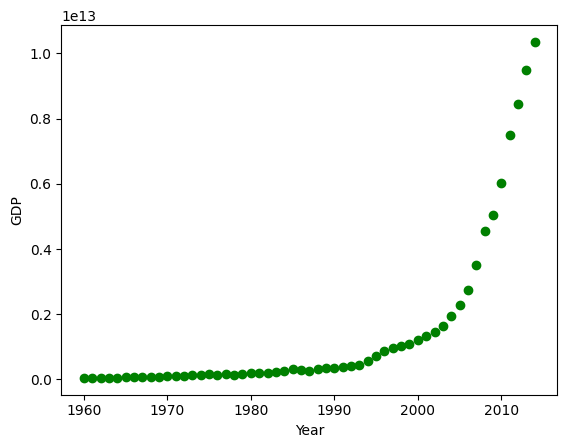

In [6]:
plt.Figure(figsize=(8, 5))
x_data , y_data = df["Year"].values, df["Value"].values

plt.plot(x_data, y_data, "go")
plt.xlabel("Year")
plt.ylabel("GDP")
plt.show()

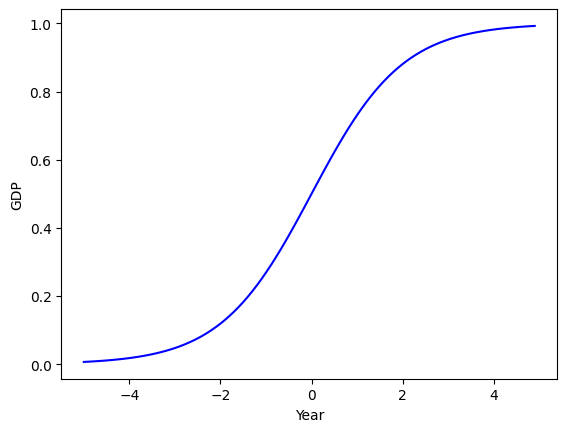

In [7]:
x = np.arange(-5.0, 5.0, 0.1)
y = 1.0 / (1.0 + np.exp(-x))

plt.plot(x, y, "b-")
plt.xlabel("Year")
plt.ylabel("GDP")
plt.show()

In [9]:
# normalizing data
xdata = x_data / max(x_data)
ydata = y_data / max(y_data)

### model definition

In [12]:
def sigmoid(x, Beta_1, Beta_2):
    y = 1 / (1 + np.exp(-Beta_1 * (x - Beta_2)))
    return y

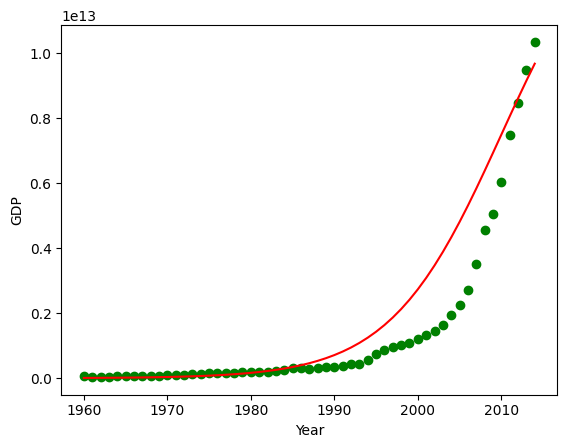

In [24]:
beta_1, beta_2 = 0.15, 2010.0

y = sigmoid(x_data, beta_1, beta_2)

plt.plot(x_data, y_data, "go")
plt.plot(x_data, y*15000000000000, color="red")
plt.xlabel("Year")
plt.ylabel("GDP")
plt.show()

In [26]:
from scipy.optimize import curve_fit

popt, pcov = curve_fit(sigmoid, xdata, ydata)

print(f"Beta_1: {popt[0]} | Beta_2: {popt[1]}")

Beta_1: 690.4517105515218 | Beta_2: 0.9972071272529957


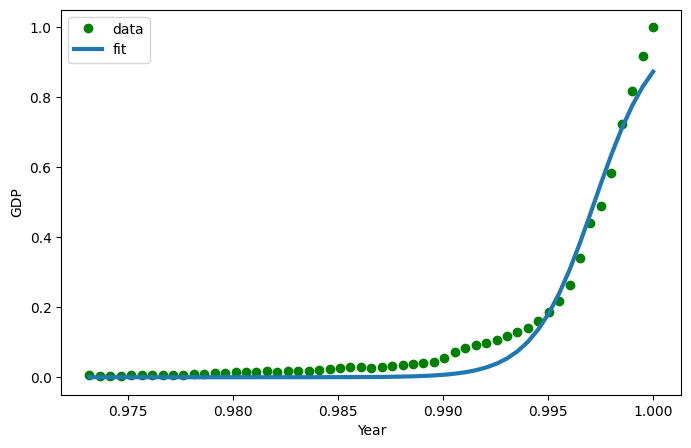

In [31]:
x = np.linspace(1960, 2014, 55)
x = x / max(x)
y = sigmoid(x, *popt)
plt.figure(figsize=(8, 5))
plt.plot(xdata, ydata, "go", label="data")
plt.plot(x, y, linewidth=3.0, label="fit")
plt.legend(loc="best")
plt.xlabel("Year")
plt.ylabel("GDP")
plt.show()